Part-1 : Getting data and Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
#read data into dataframe df
df = pd.read_csv("train.csv")

In [3]:
#get first 5 rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#find datatypes of the columns
df.dtypes

#find missing values in 'int' datatype columns
df.select_dtypes(include=['int']).isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [5]:
#find missing values in 'float' datatype columns
df.select_dtypes(include=['float']).isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [6]:
#find missing values in 'object' datatype columns
df.select_dtypes(include=['object']).isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [7]:
#get length of the dataframe
len(df)

1460

In [8]:
#summary of the dataframe (gives only 'int' or 'float' columns)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#get all column names
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

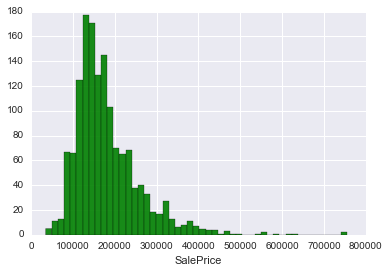

In [10]:
#plot the distribution of target variable
sns.distplot(df['SalePrice'], kde=False, color='g', hist_kws={'alpha': 0.9})

SalePrice has normal distribution

Axes(0.125,0.125;0.62x0.775)


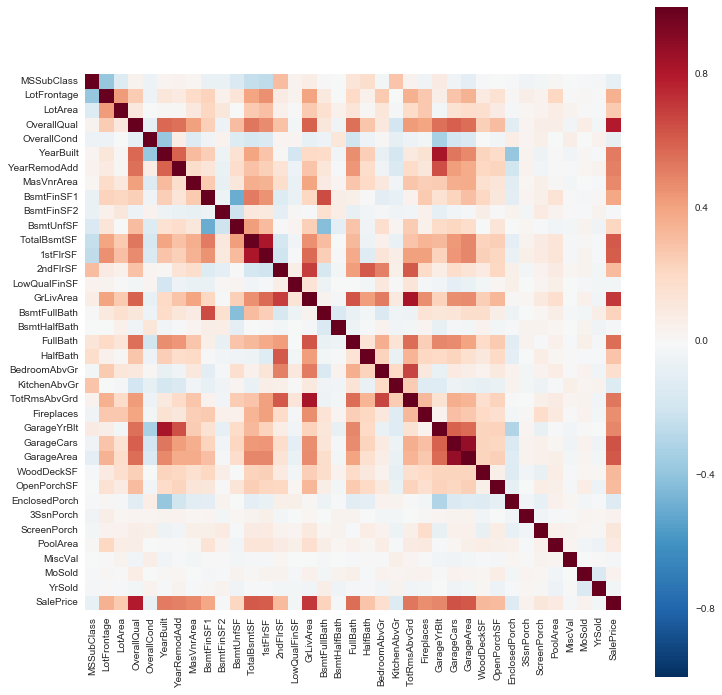

In [11]:
f, ax = plt.subplots(figsize=(12, 12))
#cmap = sns.diverging_palette(300, 10, as_cmap=True)

correlations = df.select_dtypes(include=['int', 'float']).iloc[:, 1:].corr()
#print correlations
print sns.heatmap(correlations, ax=ax, vmax=1, square=True)

In [12]:
#convert 'SalePrice' correlations column to dictionary
corr_dict = correlations['SalePrice'].to_dict()
#corr_dict

#remove 'SalePrice' from the list
del corr_dict['SalePrice']
#corr_dict

#sort list in descending order
for i in sorted(corr_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*i))

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0256061300007
MiscVal: 	-0.0211895796403
BsmtHalfBath: 	-0.0168441542974
BsmtFin

All the numerical columns are highly correlated to each other. The top features strongly correlated to SalePrice are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd,  GarageYrBlt, MasVnrArea and Fireplaces.

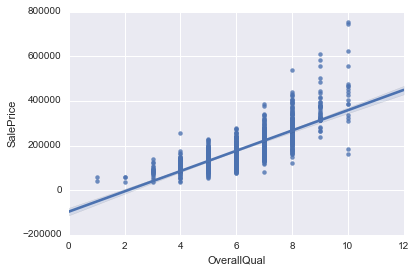

In [13]:
#linear regression plot for 'OverallQual' feature
sns.regplot(data=df, x="OverallQual", y="SalePrice")

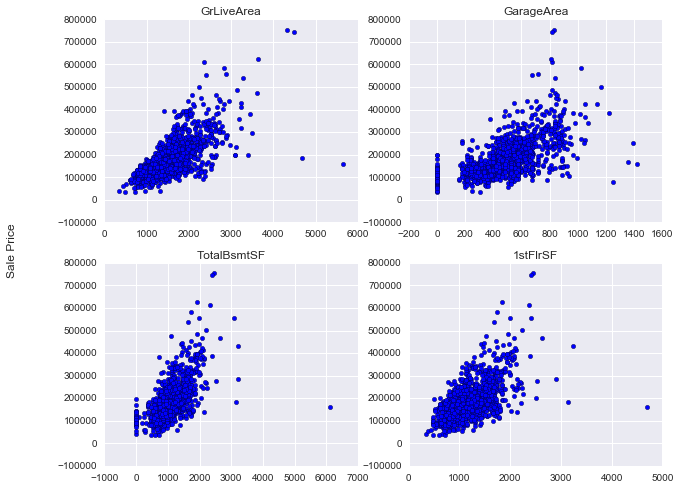

In [48]:
#scatterplots for all highly correlated area related features
#f, ax = plt.subplots(figsize=(10, 10))

salevalue = df.SalePrice.values

fig = plt.figure(1, figsize=(10, 8))
plt.subplot(221)
plt.scatter(df.GrLivArea.values, salevalue)
plt.title("GrLiveArea")

plt.subplot(222)
plt.scatter(df.GarageArea.values, salevalue)
plt.title("GarageArea")

plt.subplot(223)
plt.scatter(df.TotalBsmtSF.values, salevalue)
plt.title("TotalBsmtSF")

plt.subplot(224)
plt.scatter(df['1stFlrSF'].values, salevalue)
plt.title("1stFlrSF")

fig.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)

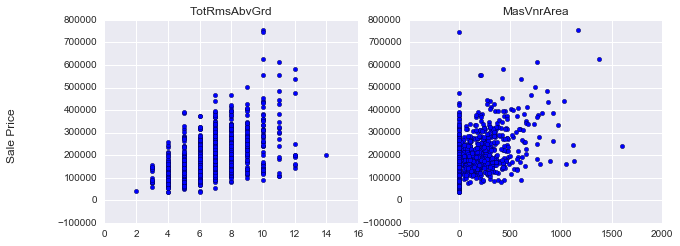

In [63]:
#scatterplots for all highly correlated area related features

fig = plt.figure(2, figsize=(10, 8))
plt.subplot(221)
plt.scatter(df.TotRmsAbvGrd.values, salevalue)
plt.title("TotRmsAbvGrd")

plt.subplot(222)
plt.scatter(df.MasVnrArea.values, salevalue)
plt.title("MasVnrArea")

fig.text(-0.01, 0.7, 'Sale Price', va='center', rotation='vertical', fontsize = 12)

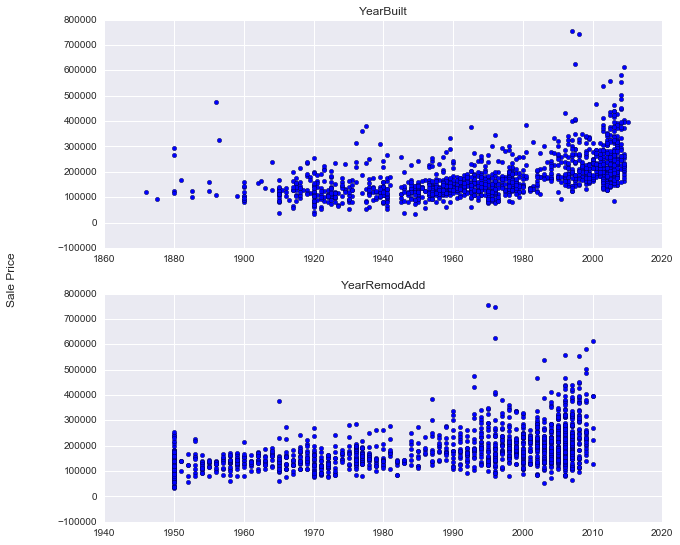

In [70]:
#scatterplots for all highly correlated year related features for the house

fig = plt.figure(3, figsize=(10, 9))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, salevalue)
plt.title("YearBuilt")

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, salevalue)
plt.title("YearRemodAdd")

fig.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)

Categorical Features

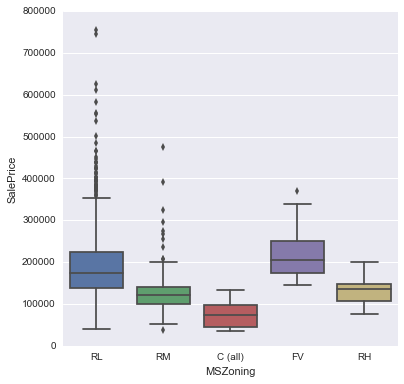

In [81]:
# MSZoning
fig = plt.figure(1, figsize=(6, 6))
sns.boxplot('MSZoning', 'SalePrice', data=df)

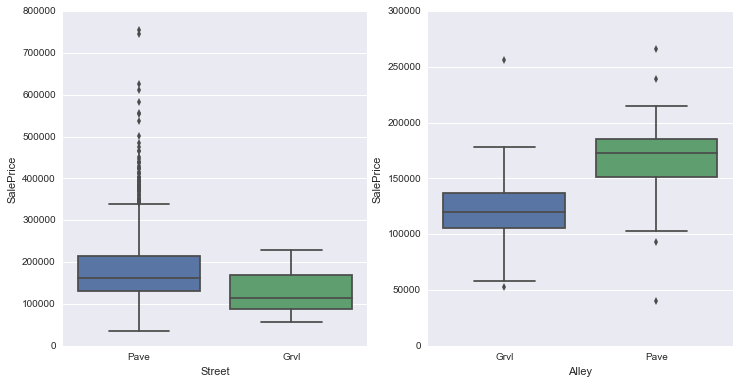

In [91]:
# Type of access to Property - Street and Alley
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot('Street', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('Alley', 'SalePrice', data=df, ax=ax[1])

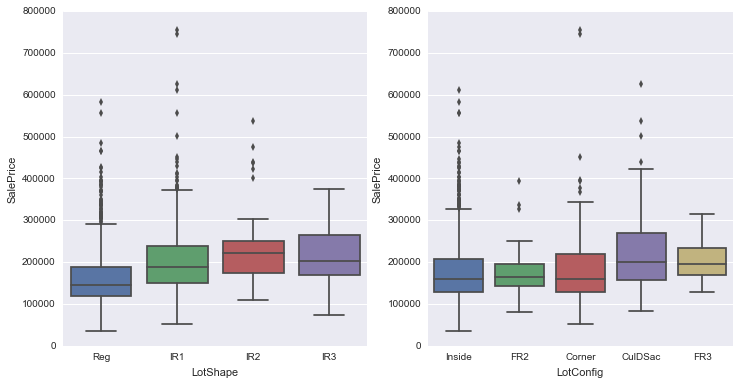

In [90]:
# Type of lot - shape and configuration
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot('LotShape', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('LotConfig', 'SalePrice', data=df, ax=ax[1])

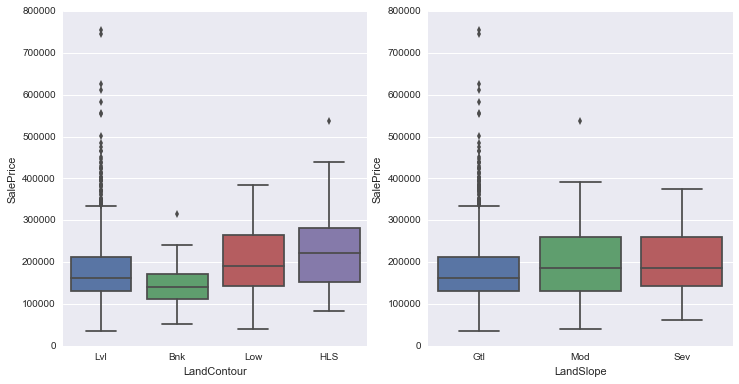

In [92]:
# Type of property - contour and slope
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot('LandContour', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('LandSlope', 'SalePrice', data=df, ax=ax[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

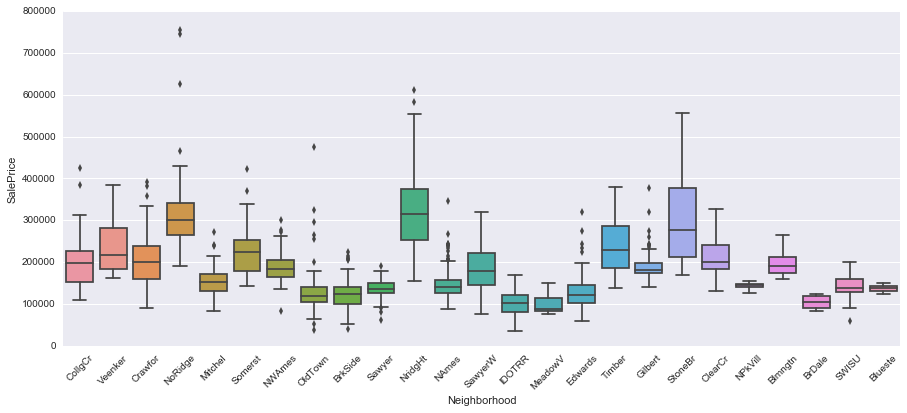

In [108]:
# Neighborhood
fig = plt.figure(figsize=(15, 6))
sns.boxplot('Neighborhood', 'SalePrice', data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

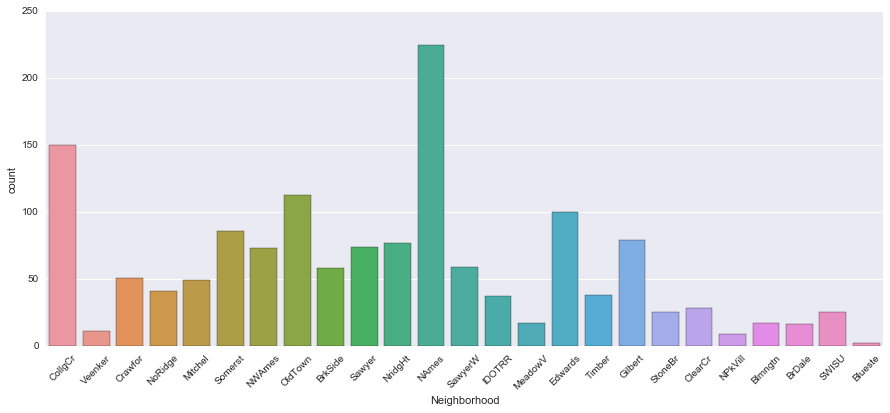

In [112]:
# count of houses sold by neighborhood
fig = plt.figure(figsize=(15, 6))
sns.countplot('Neighborhood', data=df)
plt.xticks(rotation=45)

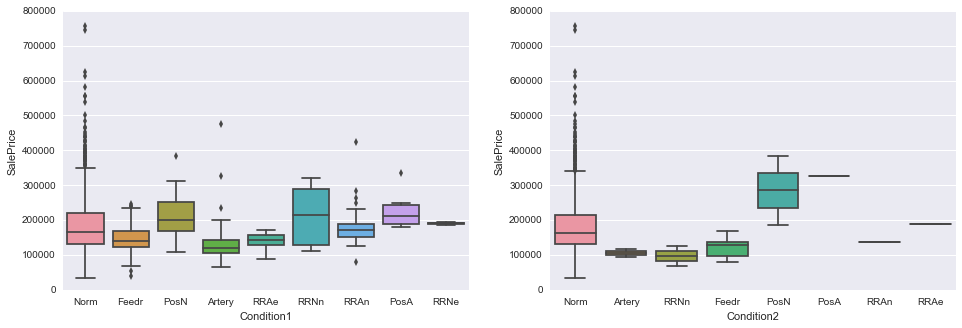

In [122]:
# Condition of the house
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot('Condition1', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('Condition2', 'SalePrice', data=df, ax=ax[1])

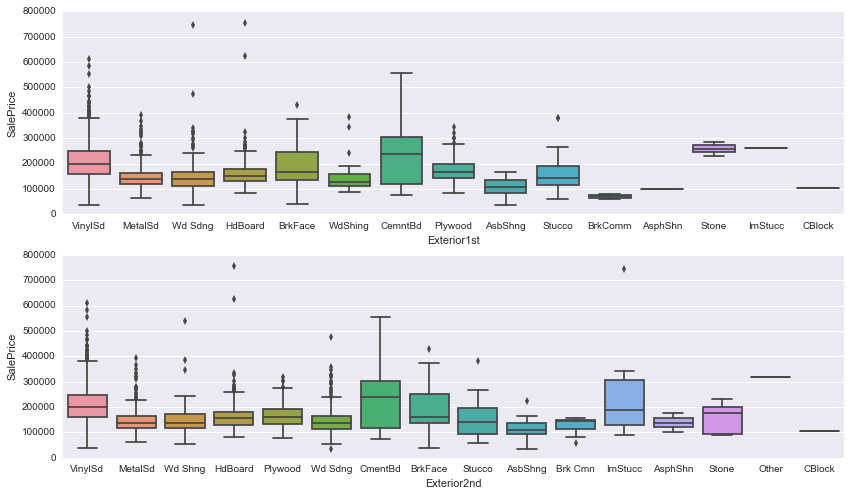

In [126]:
# Exterior condition of the house
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sns.boxplot('Exterior1st', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('Exterior2nd', 'SalePrice', data=df, ax=ax[1])
#plt.xticks(rotation=45)

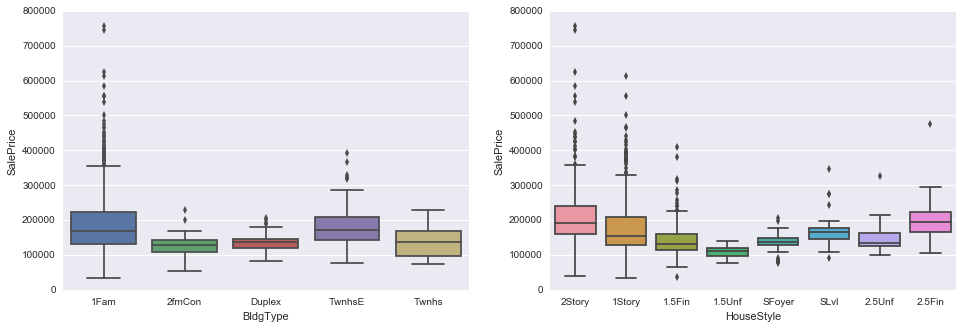

In [130]:
# Dwelling type and style
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot('BldgType', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('HouseStyle', 'SalePrice', data=df, ax=ax[1])

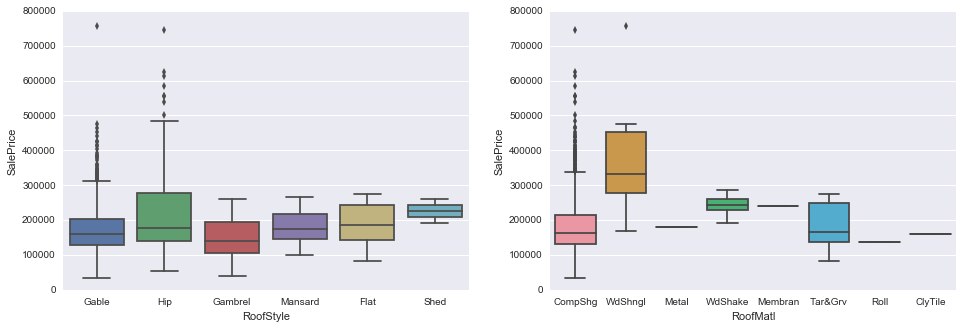

In [131]:
# Type of roof and material
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot('RoofStyle', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('RoofMatl', 'SalePrice', data=df, ax=ax[1])

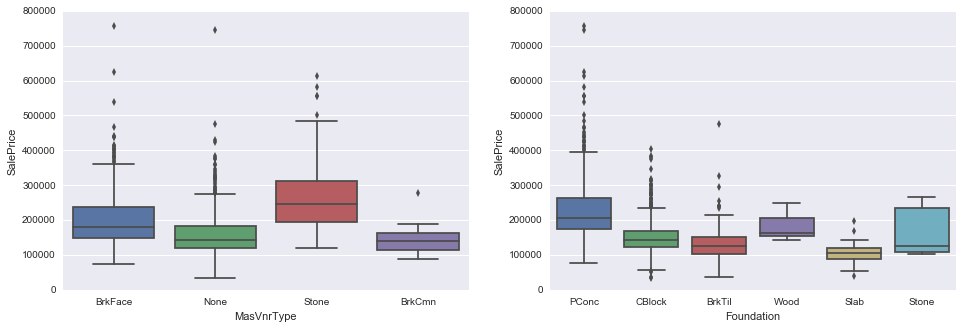

In [132]:
# Masonry veneer type and type of foundation
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot('MasVnrType', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('Foundation', 'SalePrice', data=df, ax=ax[1])

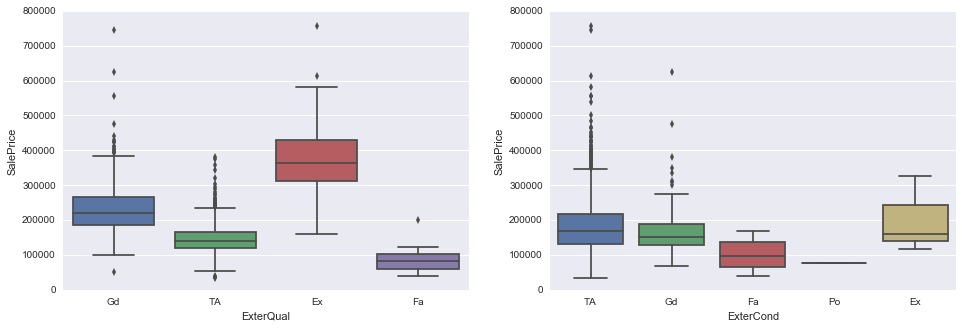

In [133]:
# Quality and present condition of the material on the exterior
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot('ExterQual', 'SalePrice', data=df, ax=ax[0])
sns.boxplot('ExterCond', 'SalePrice', data=df, ax=ax[1])